<a href="https://colab.research.google.com/github/MuhammadShavaiz/AI_learning/blob/main/Regression_with_Scikit_learn_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook performs data preprocessing, including handling null values, on the Automobile dataset. It uses pandas for data manipulation, scikit-learn for building and training a classification model, and matplotlib for visualizing the results. The goal is primarily to process data and extract useful information from it. The dataset used: https://archive.ics.uci.edu/dataset/10/automobile.**

##  Data Exploration and Preprocessing

###  Load the Data

In [391]:
import pandas as pd        # For data manipulation and analysis
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from sklearn import datasets  # For accessing built-in datasets/functions in scikit-learn
from sklearn.model_selection import train_test_split # For splitting data into test and train

In [392]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)
# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

df = pd.concat([X, y], axis=1)

### Data Exploration and Preprocessing

Number of rows: 205
Number of columns: 25

First few rows of the features DataFrame:
     price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  length wheel-base  \
0    2.68  3.47        mpfi          130  ...   168.8       88.6   
1    2.68  3.47        mpfi          130  ...   168.8       88.6   
2    3.47  2.68        mpfi          152  ...   171.2       94.5   
3    3.40  3.19        mpfi          109  ...   176.6       99.8   
4    3.40  3.19        mpfi          136  ...   176.6       99.4   

   engine-location  drive-wheels   bo

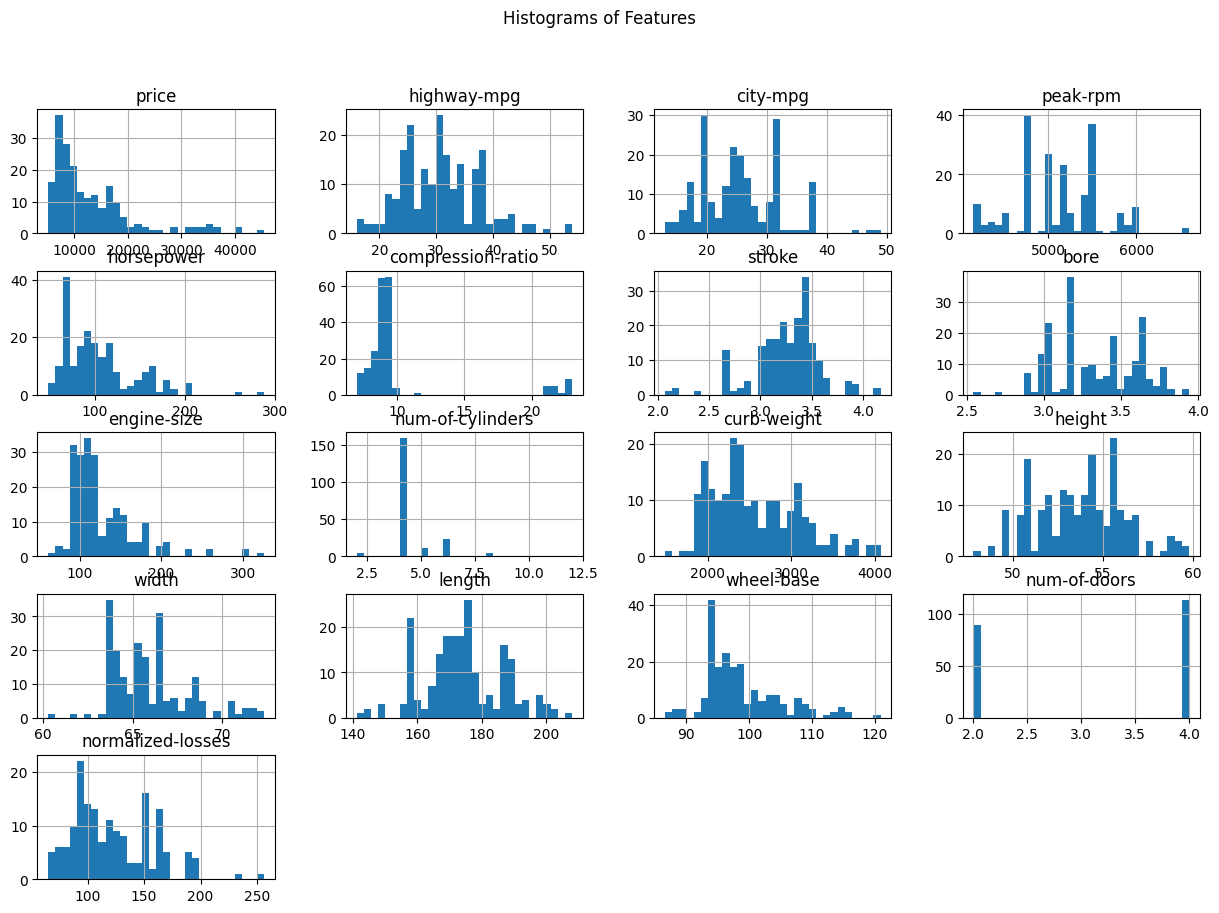

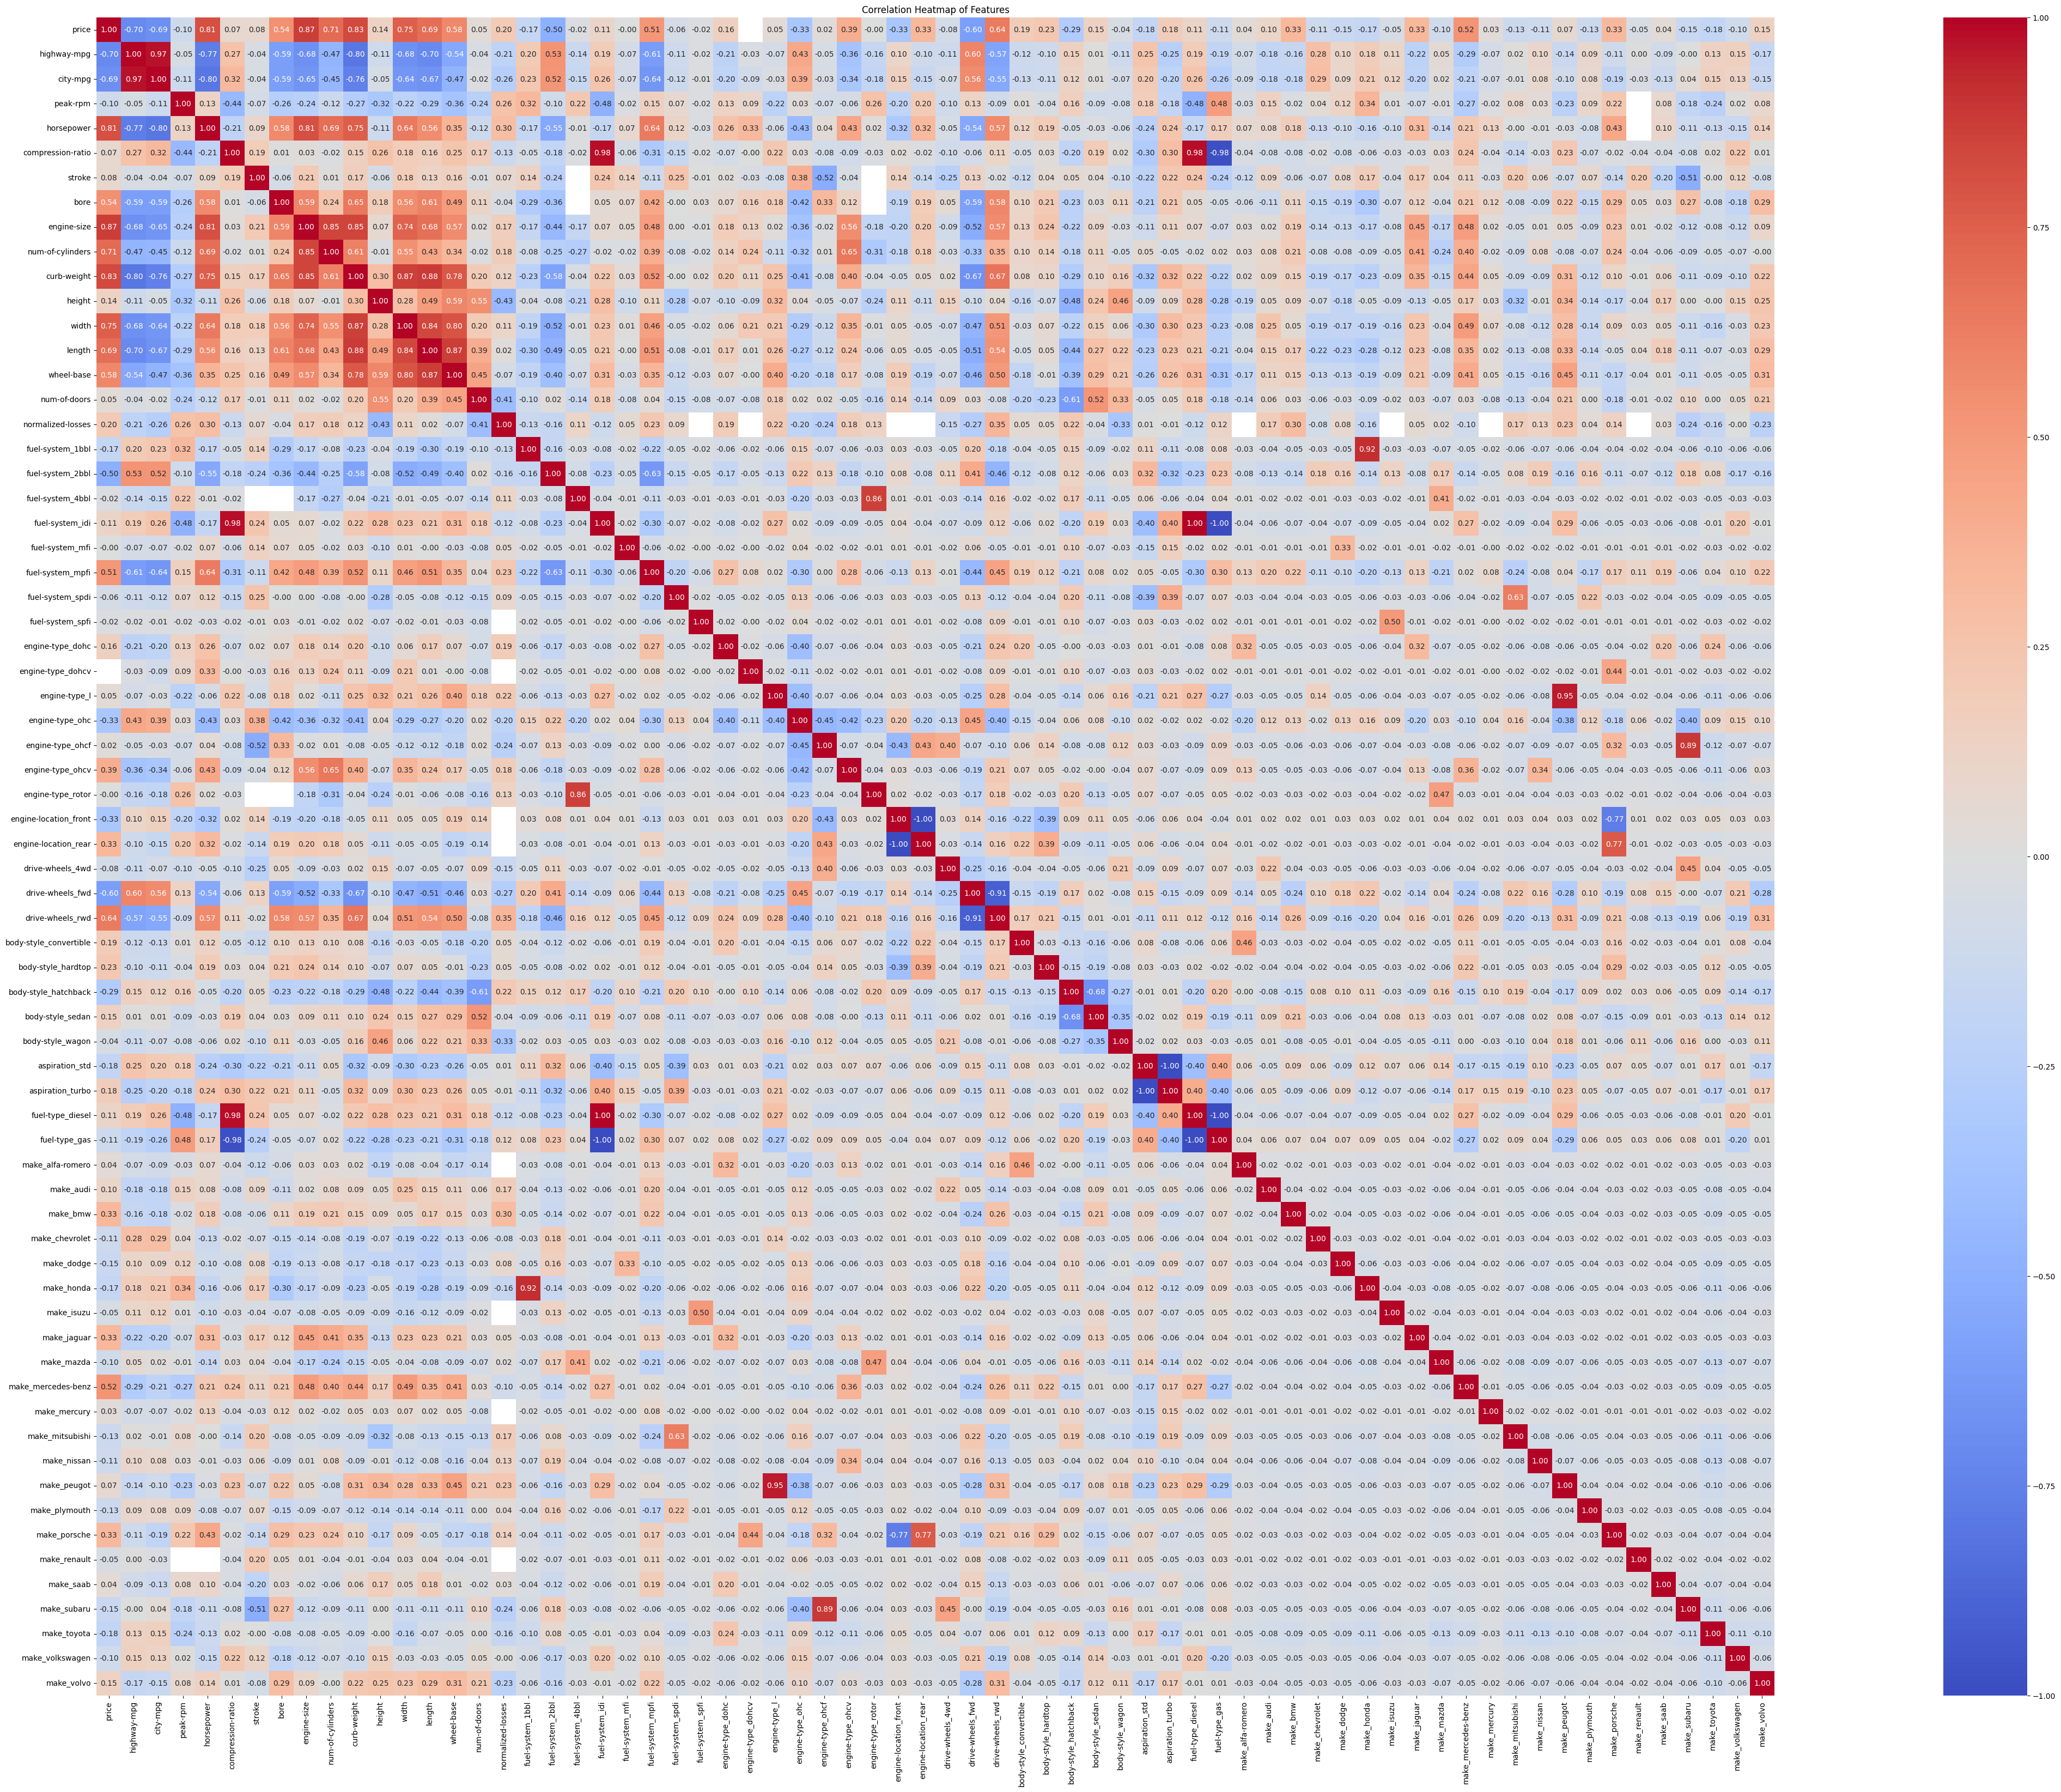

In [393]:
import seaborn as sns
# Check the properties of the DataFrames
print("Number of rows:", X.shape[0])
print("Number of columns:", X.shape[1])
print("\nFirst few rows of the features DataFrame:")
print(X.head())

print("\nDescriptive statistics:")
print(X.describe())

print("\nInfo about the DataFrame:")
print(X.info())

# Visualize the distribution of features using histograms
X.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Features')
plt.show()

# Convert categorical columns to numerical using get_dummies
X = pd.get_dummies(X, drop_first=False)

# Now compute the correlation matrix
plt.figure(figsize=(80, 40))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

### Data Cleaning

In [394]:
# Check for missing values
missing_values = X.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 price              4
highway-mpg        0
city-mpg           0
peak-rpm           2
horsepower         2
                  ..
make_saab          0
make_subaru        0
make_toyota        0
make_volkswagen    0
make_volvo         0
Length: 68, dtype: int64


In [395]:
df = pd.concat([X, y], axis=1)
# Dropping column with large number of missing values
X = X.drop('normalized-losses', axis=1)
# Dropping rows with missing values
df = df.dropna()
X = df.iloc[:, :67]  # Features
y = df.iloc[:,68]   # Target
# you can fill the missing values if the missing data is very large:
# Filling missing values with the mean (for numerical columns)
# X_filled = X.fillna(X.mean())
# For categorical columns, use mode imputation
# X_filled['categorical_column'] = X_filled['categorical_column'].fillna(X_filled['categorical_column'].mode()[0])


In [396]:
print(df.iloc[:,68])

3      2
4      2
6      1
8      1
10     2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 159, dtype: int64


In [397]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 price              0
highway-mpg        0
city-mpg           0
peak-rpm           0
horsepower         0
                  ..
make_subaru        0
make_toyota        0
make_volkswagen    0
make_volvo         0
symboling          0
Length: 69, dtype: int64


In [398]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [399]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [400]:
# First few rows of our processed data
X.head()

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  0.427398    -0.323313 -0.414945  0.831733    0.201279          -0.041559   
1  1.024734    -1.565772 -1.402122  0.831733    0.625812          -0.557392   
2  1.069108    -1.099850 -1.237593  0.831733    0.462530          -0.428433   
3  2.121274    -1.876386 -1.566652  0.831733    1.442223          -0.480017   
4  0.850653    -0.478620 -0.579475  1.477884    0.168622          -0.351058   

     stroke      bore  engine-size  num-of-cylinders  ...  make_mitsubishi  \
0  0.556703 -0.413240    -0.336785         -0.357854  ...        -0.259064   
1  0.556703 -0.413240     0.552401          1.139483  ...        -0.259064   
2  0.556703 -0.413240     0.552401          1.139483  ...        -0.259064   
3  0.556703 -0.638386     0.387737          1.139483  ...        -0.259064   
4 -1.484399  0.750015    -0.369717         -0.357854  ...        -0.259064   

   make_nissan  make_peugot  make_plymouth  make_porsche  make_renault  \
0    -0.357295    -0.214599       -0.19803     -0.079556           0.0   
1    -0.357295    -0.214599       -0.19803     -0.079556           0.0   
2    -0.357295    -0.214599       -0.19803     -0.079556           0.0   
3    -0.357295    -0.214599       -0.19803     -0.079556           0.0   
4    -0.357295    -0.214599       -0.19803     -0.079556           0.0   

   make_saab  make_subaru  make_toyota  make_volkswagen  
0   -0.19803    -0.285714    -0.492125        -0.230174  
1   -0.19803    -0.285714    -0.492125        -0.230174  
2   -0.19803    -0.285714    -0.492125        -0.230174  
3   -0.19803    -0.285714    -0.492125        -0.230174  
4   -0.19803    -0.285714    -0.492125        -0.230174  

[5 rows x 67 columns]

##  Feature Extraction and Model Training

### Feature Selection/Extraction

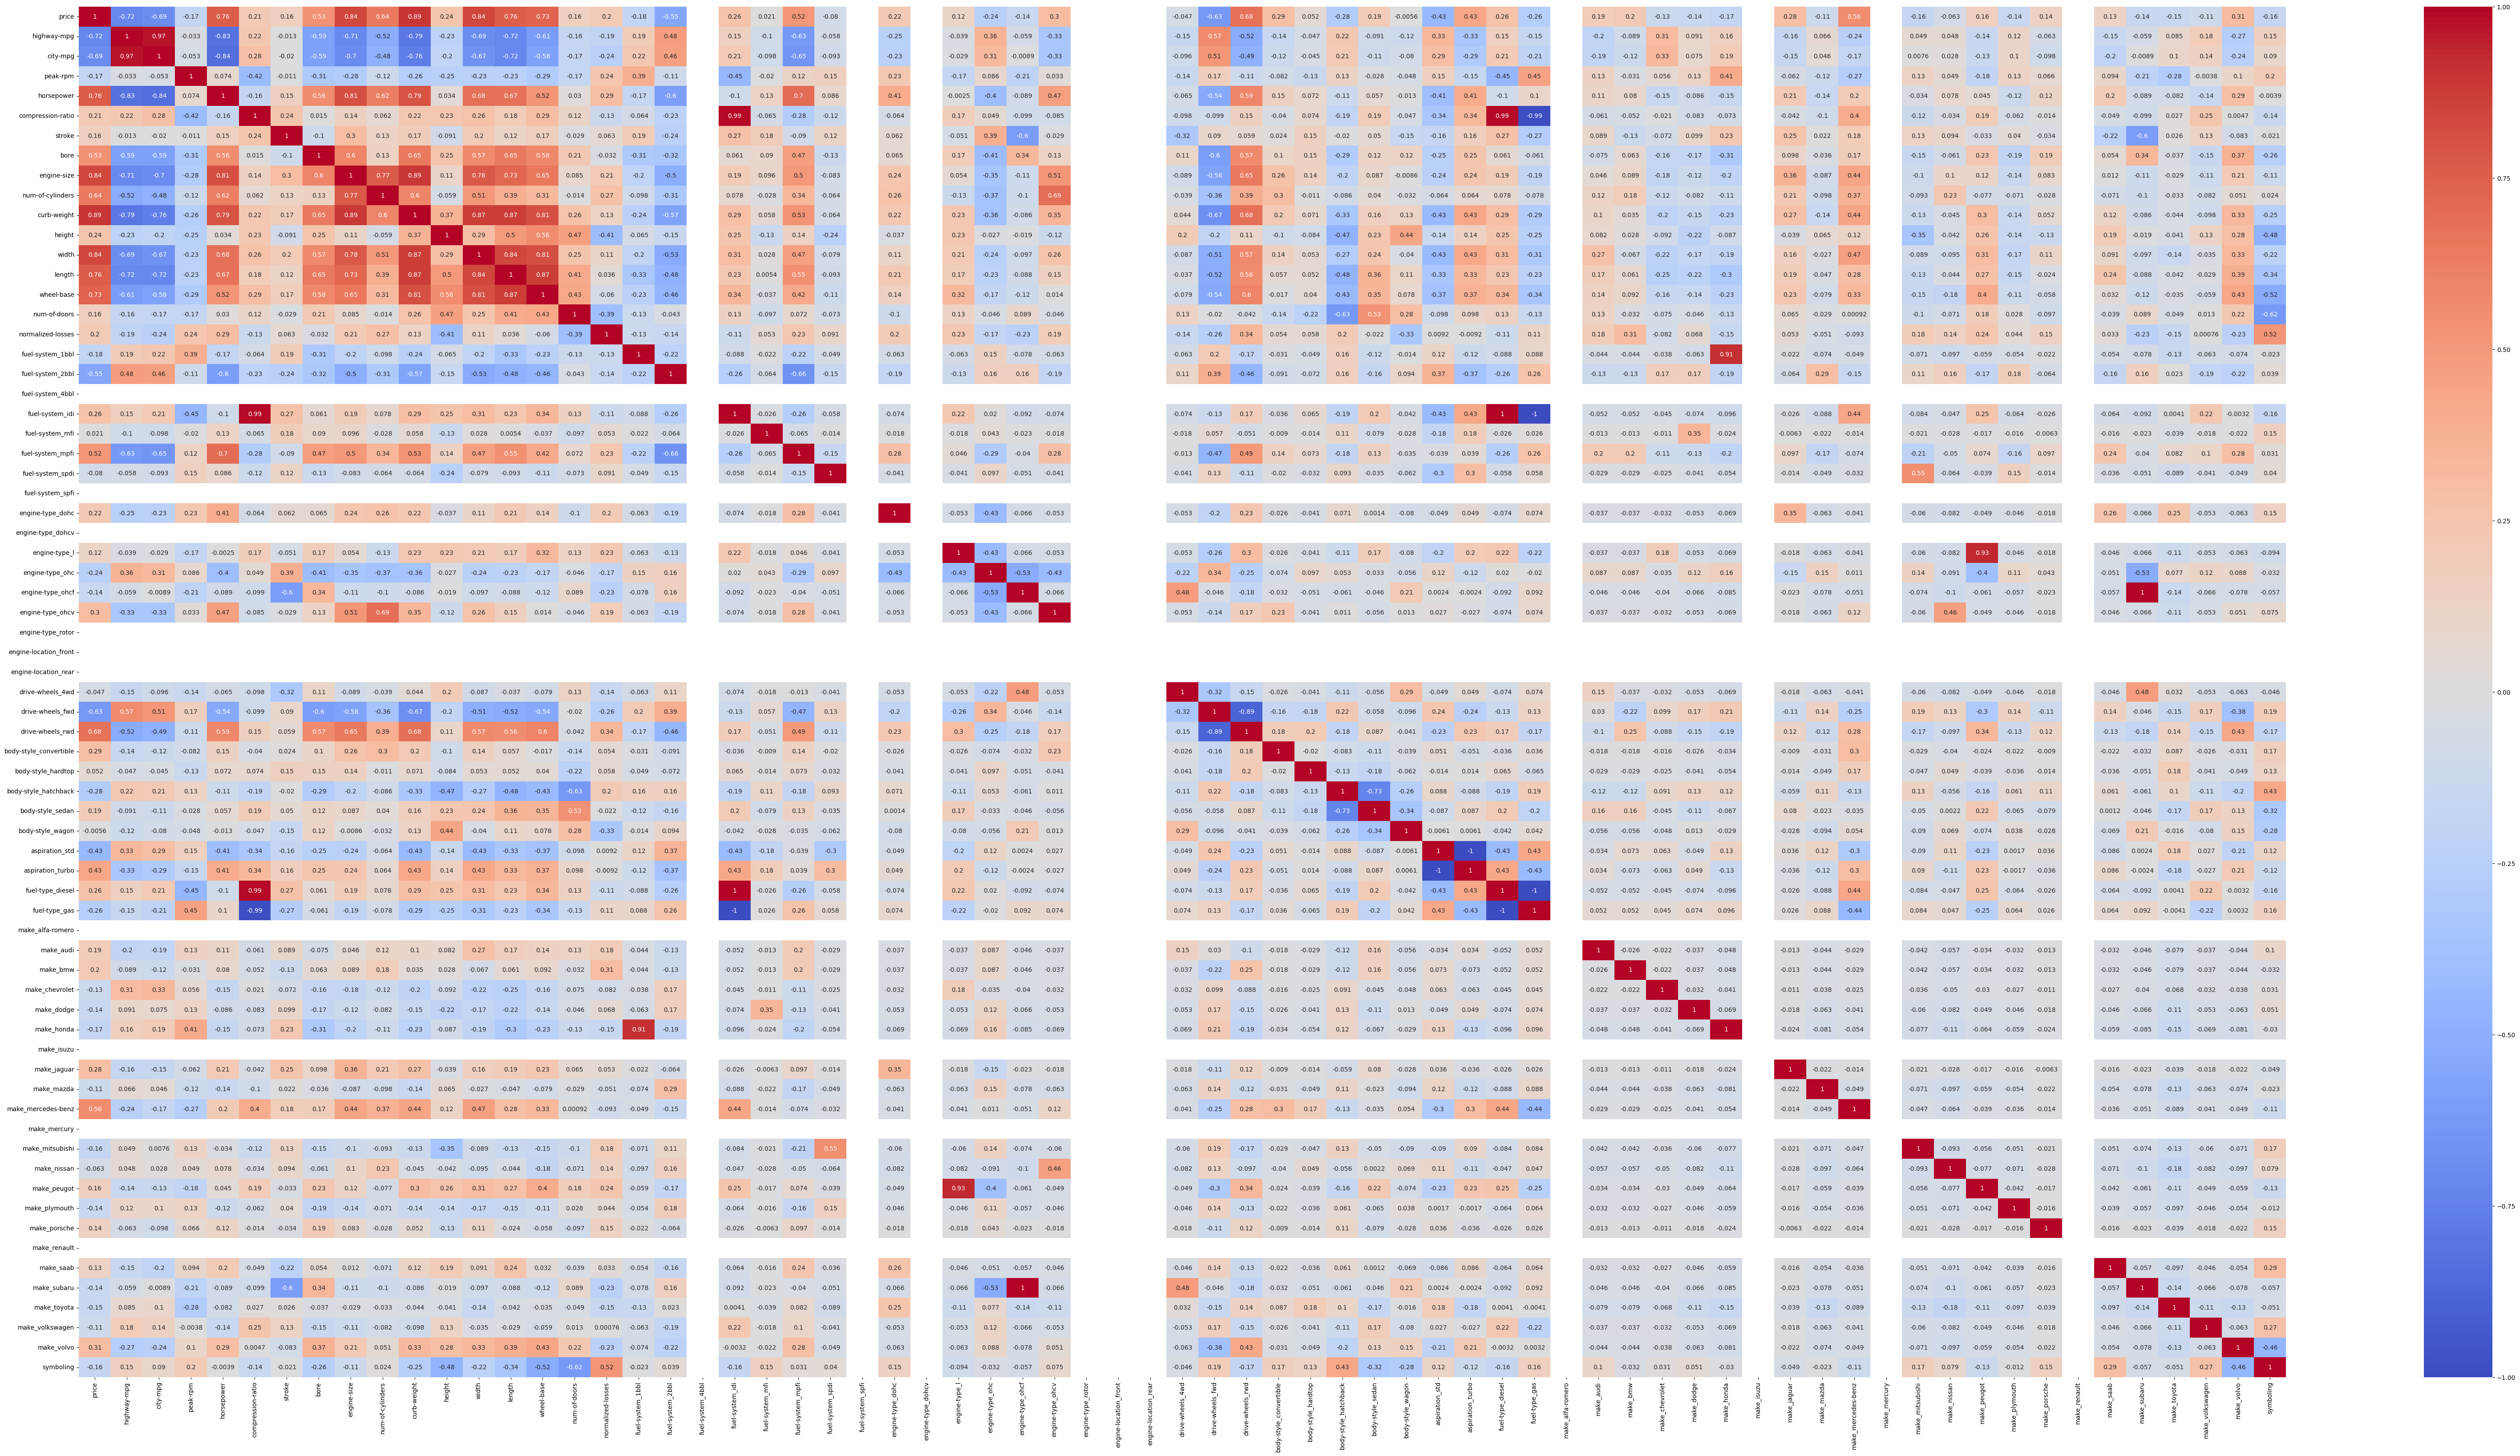

In [401]:
# Corelataion analysis
correlation_matrix = df.corr()
plt.figure(figsize=(80, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Features with strong correlation
relevant_features = correlation_matrix['symboling'].abs().sort_values(ascending=False)



**You can drop the features with less corelation and less importance, in this case we will be using all the features.**

### Model Training

In [402]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
from sklearn.linear_model import LinearRegression
# Initialize the Lienar Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_LR = model.predict(X_test)

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_RFR = model.predict(X_test)

In [403]:
print(y_pred_RFR)

[ 1.57  1.    2.73  0.    0.88  2.56  1.95  0.23  0.07  1.59  0.11  0.51
  2.91  0.46  0.    1.4   2.8   0.99 -1.02  0.47  0.6   0.49  0.73  1.04
  0.05  0.23  0.6   1.41 -0.99  1.74  0.66  0.99]


In [404]:
print(y_pred_LR)

[ 2.37576309  1.19891774  3.21625802  0.01260665  0.90654314  0.78234521
  1.44432159  0.19536554  1.10028559  1.71893567  0.1047027   1.20603946
  2.54156135  0.96715303 -0.35074329  1.58400757  1.3826779   1.5783013
 -1.5200777   0.98438119 -0.64160977  0.35131303  0.58657457  1.62717984
  0.17441017 -0.68329939  0.08967463  1.60281563 -1.24445878  1.44716629
  0.3040833   1.59244322]


In [405]:
print(y_test)

183    2
94     1
136    3
162    0
85     1
29     3
178    3
152    1
148    0
188    2
100    0
6      1
106    1
97     1
115    0
186    2
125    3
52     1
200   -1
93     1
158    0
13     0
54     1
22     1
144    0
41     0
101    0
166    1
173   -1
30     2
159    0
51     1
Name: symboling, dtype: int64


## Evaluation, Visualization and Comparison

### Linear Regression Evaluation

In [406]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [407]:
# Calculate evaluation metrics
#Linear Regression
mae_LR = mean_absolute_error(y_test, y_pred_LR)
mse_lR = mean_squared_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)
print(f'mean absolute error: {mae_LR}')
print(f'mean square error: {mse_lR}')
print(f'r2-error: {r2_LR}')

mean absolute error: 0.5474085292273857
mean square error: 0.5698883083978548
r2-error: 0.5185102080863009


### Random Forest Regressor Evaluation

In [408]:
# Calculate evaluation metrics
#Random Forest Regression
mae_RFR = mean_absolute_error(y_test, y_pred_RFR)
mse_RFR = mean_squared_error(y_test, y_pred_RFR)
r2_RFR = r2_score(y_test, y_pred_RFR)
print(f'mean absolute error: {mae_RFR}')
print(f'mean square error: {mse_RFR}')
print(f'r2-error: {r2_RFR}')

mean absolute error: 0.36250000000000004
mean square error: 0.28028125
r2-error: 0.7631947194719472


### Visualization of Results and Model Comparison

In [409]:
# Linear Regression
# Create a DataFrame for evaluation results
results_df = pd.DataFrame({
 'Model': ['Linear Regression'],
 'MAE': [mae_LR],
 'MSE': [mse_lR],
 'R2': [r2_LR],
})
# Save the results to a CSV file
results_df.to_csv('Linear_Regression.csv', mode='a', header=True, index=False)


In [410]:
# Random Forest Regresor
# Create a DataFrame for evaluation results
results_df = pd.DataFrame({
 'Model': ['Random Forest Regression'],
 'MAE': [mae_RFR],
 'MSE': [mse_RFR],
 'R2': [r2_RFR],
})
# Save the results to a CSV file
results_df.to_csv('RandomForest_Regression.csv', mode='a', header=True, index=False)


### visual representation

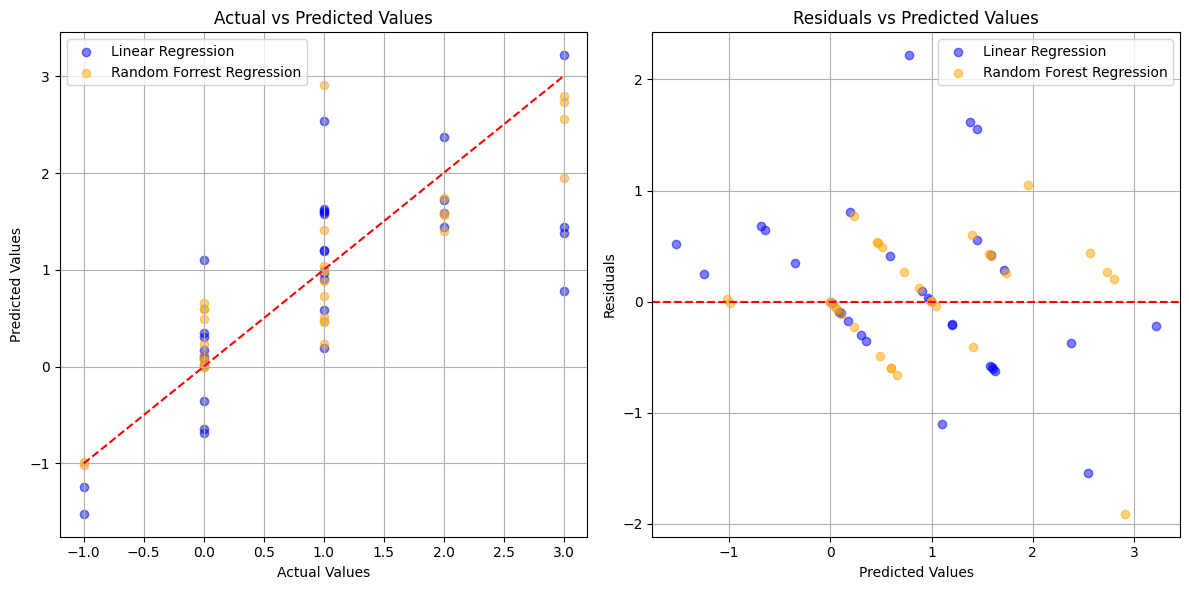

In [411]:
# Scatter Plot for Linear Regression and SVR
plt.figure(figsize=(12, 6))
# Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_LR, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_RFR, color='orange', alpha=0.5, label='Random Forrest Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
# Residual Plot for Linear Regression and SVR
plt.subplot(1, 2, 2)
residuals_LR = y_test - y_pred_LR
residuals_RFR = y_test - y_pred_RFR
plt.scatter(y_pred_LR, residuals_LR, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_pred_RFR, residuals_RFR, color='orange', alpha=0.5, label='Random Forest Regression')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
